# ggplot2 - grammar of graphics plot

Bei wissenschaftlichen Experimenten oder auch Studien fallen zahlreiche Auswertungsergebnisse an. Um einen komplizierten Zusammenhang oder Sachverhalt verständlicher darzustellen werden die Daten aufbereitet und in einer Grafik veranschaulicht. Auf einen Blick erhält man so einen groben Überblick und erkennt eventuell erste Zusammenhänge über die Daten. 

Im Jahr 2005 entwickelte der neuseeländische Statistiker und Entwickler *Hadley Wickham* das Paket ggplot2. Basierend auf den Grundlagen des Buches „The Grammar of Graphics“ von Leland Wilkinson baute Wickham sein Datenvisualisierungspaket auf und übernahm die grundlegenden Thesen des Buches, die auch heute noch als richtungsweisend für die Statistik gelten.

R bietet mit dem Erweiterungspaket **ggplot2** eine umfangreiche Bibliothek zur Erstellung von Grafiken. Unter folgendem Link können jederzeit weitere Packete heruntergeladen und dementsprechend hinzugefügt werden (http://www.ggplot2-exts.org/gallery/).
Dabei reicht die Bandbreite von sehr einfachen und schnell zu erstellenden bis hin zu vollständig, an die eigenen Bedürfnisse anpassbaren, Grafiken. Diese sind zwar mit deutlich höherem Aufwand verbunden, aber ansonsten ohne Probleme auch bei sehr komplexen Grafiken erstellbar.

Jedoch können nicht alle erdenklichen Grafiken mit ggplot2 erstellt werden. Beispielsweise 3D Grafiken können nicht visualisiert werden, dort stößt ggplot2 an seine Grenzen. 


### Das Konzept 

Jede ggplot2-Grafik hat drei Kernkomponenten:

1. **Dataframe** - Daten
2. **aesthetics** - Ein Set von Verknüpfungen zwischen Variablen in den Daten und visuellen Eigenschaften 
3. **geom** - Ein geometrisches Layer-Objekt das beschreibt, wie jeder Datenpunkt gerendert (aufbereitet, wiedergegeben) wird



**aesthetics (aes)**: 
* wird immer innerhalb des ggplots implementiert, kann aber auch innerhalb des *geom_* auftreten
* unterteilt und unterscheidet Daten und verdeutlicht Abhängigkeit untereinander
* Parameter können variieren 


**geom_()**:
* formgebende Merkmale, bestimmen dementsprechen die allgemeine Darstellung der Daten
* Beispiele für geom_    
* 
    1.  geom_bar
    2.  geom_point
    3.  geom_line
    4.  geom_smooth
    5.  geom_histogram
    6.  geom_boxpolot
    7.  geom_text
    8.  geom_density
    9.  geom_errorbar
    10. geom_hline, geom_vline
    
    

* Diese werden außerhalb des ggplots implementiert und mit dem **+**-Operator mit dem restlichen Code verbunden 



Nun werden ein paar geoms gezeigt mit der "Hilfssuche".

**Änderungsvorschlag NG**

zu geom () 10. geom_hline und geom_vline das gleiche/ähnliche oder sind das zwei ganz unterschiedliche und du hast vergessen das als 11. zu machen?

In [3]:
# Wichtig: dies kann man erst ausführen, nachdem die Installation beachtet wurde!


# "hilfe" Suche alles was mit geom_ beginnt aus dem Packet ggplot2
geoms <- help.search("geom_", package="ggplot2")
# Zeige mir den Namen und den Titel der ersten 5 geoms
geoms$matches[1:5, 1:2]




Topic,Title
geom_abline,"Reference lines: horizontal, vertical, and diagonal"
geom_abline,"Reference lines: horizontal, vertical, and diagonal"
geom_abline,"Reference lines: horizontal, vertical, and diagonal"
geom_bar,Bars charts
geom_bar,Bars charts


### Installierung 

Zunächst muss ggplot2 installiert werden, falls dies noch nicht passiert ist. 

In [1]:
install.packages("ggplot2")  # Muss nur einmal ausgeführt werden, falls das Paket noch nicht installiert ist

ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


Sofern das Paket bereits installiert ist erfolgt die Einbindung der Bibliothek. Die Bibliothek muss bei jedem Neustart des Programms eingelesen werden, dies geschieht mit folgendem Befehl: 

In [2]:
library(ggplot2)  # Zur Einbindung von ggplot2 in das folgende R-Skript

**Änderungsvorschlag NG**

evtl ist es sinnvoller die Installation vor der Hilfesuche zu tun, dass jeder am Anfang erst überprüfen kann, ob ggplot2 installiert ist oder nicht und die entsprechende Bibliothek direkt einliest.

#### qplot 

GGPlot2 stellt zwei grundlegende Funktionen zur Verfügung. Eine davon ist eine sehr anfängerfreundliche Funktion namens qplot, kurz für quick plot. Sie folgt nicht dem typischen GGPlot2-Schema und ist eher als Einstieg ins Plotting gedacht, ermöglicht
jedoch dieselbe Plotvisualisierung wie die ggplot-Funktion. Ihr Aufbau und ihre Gestaltung wird lediglich durch verschiedene Parameter bestimmt.

Mögliche Parameter sehen wie folgt aus: 

qplot ( x , y , 
        data =, 
        color =, 
        shape =, 
        fill =, 
        size =, 
        alpha=,
        2 geom=, 
        method=, 
        formula=, 
        facets =, 
        xlim =, 
        ylim=, 
        xl ab =,
        yl ab =, 
        main=, 
        sub=)

Der qplot folgt nicht, wie der ggplot, den Grammer of graphics. Deshalb möchte ich an dieser Stelle nicht weiter darauf eingehen und mich stattdessen auf ggplot konzentrieren. Bei den Anwendungsbeispielen wird eine Grafik mit qplot () gezeigt. 

##### Die Hilfe für ggplot2 

Mit Hilfe des ? vor ggplot2 kann die Hilfsfunktion erreicht werden. Diese leitet den Nutzer direkt zu der Github-Seite, in der sich diverese Tutorial befinden. 

In [4]:
? ggplot2

#### Anwendungsbeispiele mit dem Datensatz "mariano_rivera.csv"

Um ein besseres Verständis für ggplot zu erhalten werde ich anhand des Datensatzes: "mariano_rivera.csv" verschiedene Grafiken darstellen und dabei verschiedene Funktionen weiter beschreiben. 

Der Datensatz wurde zur Verfügung gestellt von Herrn Prof. Dr. von Schwerin. Der Datensatz befindet sich in dem Ordner "data". 

Ebenso wird bei den Anwendungsbeispielen ein selbst erzeugter Datensatz verwendet. Der Datensatz "Note_Klasse_4b.csv" ist ein fiktiver Datensatz und hat so keinerlei bezug auf die Namen. Dies dient nur zur Übung und Veranschaulichung. 

Mit diesen Datensätzen möchte ich die folgenden Grafiken erläutern. 

    a) Streudiagramm 
    b) Balkendiagramm 
    c) Boxplot
    d) Liniengrafik 
    e) Density Plots 
    f) Heatmap 
    
    


In [5]:
#Die csv Datei wird eingelesen mit dem "read." Befehl. 

from_csv <- read.csv('data/mariano-rivera.csv', stringsAsFactors = FALSE, sep=';')
# Zeige mir die ersten 5 Zeilen des Datensatzes an
head(from_csv)

Year,Age,Tm,Lg,W,L,W.L.,ERA,G,GS,...,WP,BF,ERA.,WHIP,H.9,HR.9,BB.9,SO.9,SO.BB,Awards
1995,25,NYY,AL,5,3,0.625,Mai 51,19,10,...,0,301,84,1.507,09. Mai,01. Mai,4.0,06. Sep,Jan 70,
1996,26,NYY,AL,8,3,0.727,02. Sep,61,0,...,1,425,240,0.994,06. Jan,0.1,02. Aug,10. Sep,Mrz 82,CYA-3MVP-12
1997,27,NYY,AL,6,4,0.600,Jan 88,66,0,...,2,301,239,1.186,08. Feb,0.6,02. Mai,08. Mai,Mrz 40,ASMVP-25
1998,28,NYY,AL,3,0,1.000,Jan 91,54,0,...,0,246,233,1.060,7.0,0.4,02. Mai,05. Mrz,02. Dez,
1999,29,NYY,AL,4,3,0.571,Jan 83,66,0,...,2,268,257,0.884,05. Jun,0.3,02. Mrz,06. Aug,Feb 89,ASCYA-3MVP-14
2000,30,NYY,AL,7,4,0.636,Feb 85,66,0,...,2,311,170,1.097,06. Sep,0.5,3.0,06. Sep,Feb 32,AS


Sofern die obrige **Installation** beachtet und der Datensatz erfolgreich eingelesen wurde, werden die verschiedenen Grafiken erzeugt. 

Beginnen wir mit dem Streudiagramm: 




### Streudiagramm (*geom_point ()*) 

Als erstes erstellen wir mithilfe des ggplot ein Streudiagramm (geom_point). Ohne Farben, und auf der X-Achse soll das Alter (*Age*) Angabe stehen und auf der Y-Achse *BB*. 

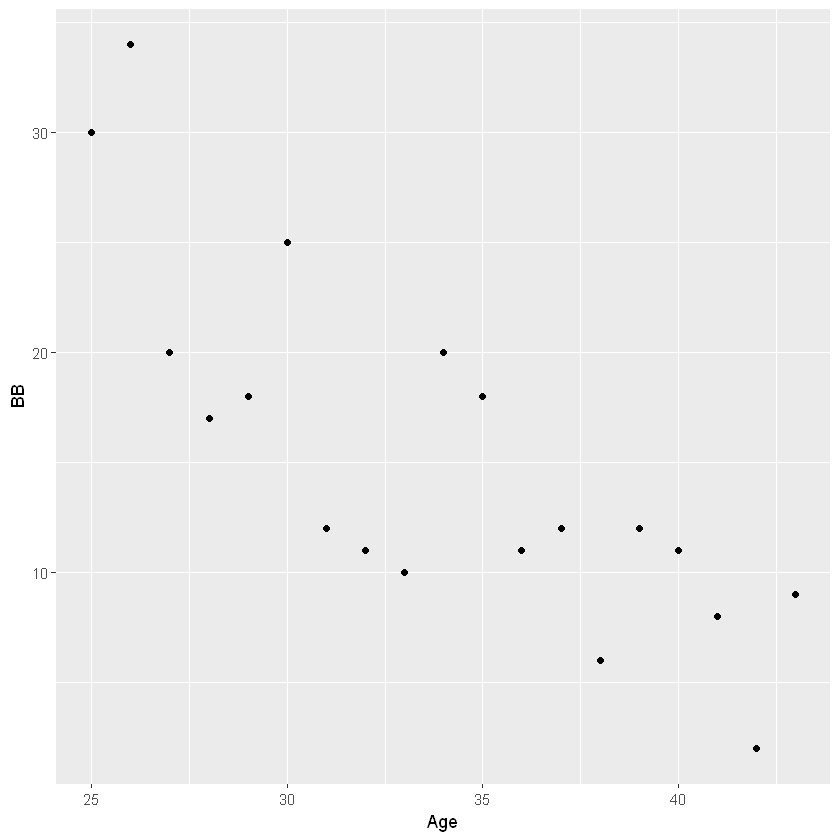

In [6]:
ggplot(from_csv) + 
 geom_point(mapping = aes(x=Age, y=BB))

Bei ggplot2 gibt es mehrere Wege um an das selbe Ergebnis zu gelangen. Deshalb erstellen wir als nächstes die gleiche Grafik wie oben nur als **qglot()**. 

Dabei soll der Graf genau gleich aussehen wie der Obrige (gleiche Daten sollen verwendet werden).

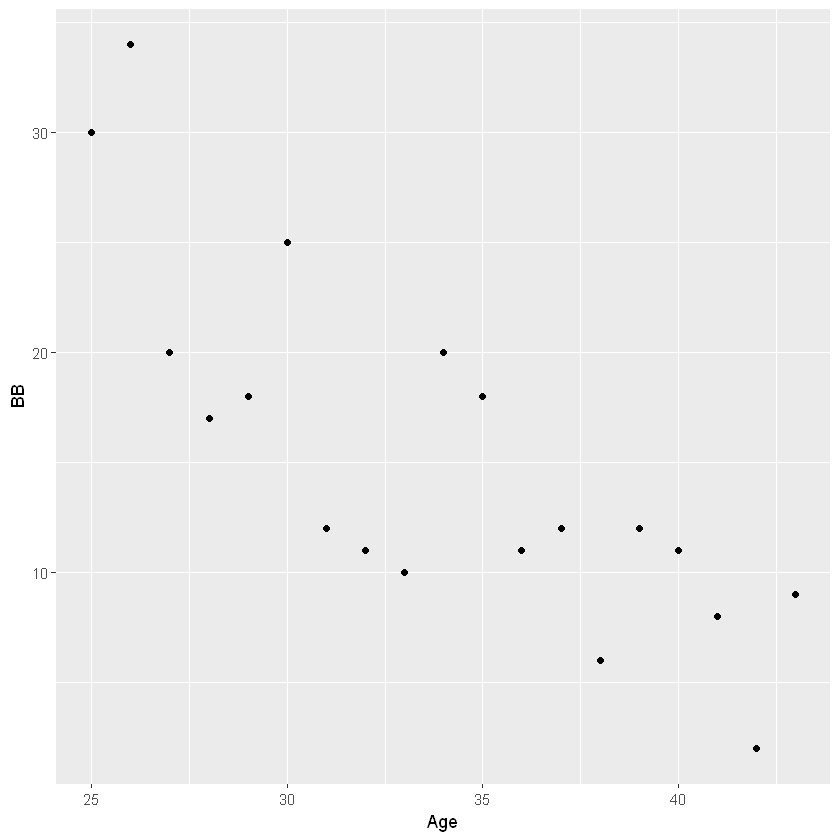

In [7]:
qplot(x= Age, y= BB, data=from_csv) 

Ein Streudiagramm zu erstellen geht ziemlich schnell und erfordert keine großen Kenntnisse. Egal ob mit ggplot() oder qplot(). 

Die Grafik kann natürlich auch eingefäbrt werden. 
**Beachte:** die Farben werden nicht im plot selbst generiert sondern erst dann, wenn die "Punkte" der Punktewolke gezeichnet werden. 

Um das Problem zu verdeutlichen wird das Streudiagramm einmal "richtig" und einmal "falsch" gefärbt. 

In ggplot2 ist die Standardfarbe, sobald man colour im ggplot () eingibt, immer eine rötliche/ korallenfarbige Farbe. Das dahinter geschriebene "blue" wird nur als Legende angezeigt. Somit sagt dieses Streudiagramm aus, dass es sich um "blaue" Daten handelt. 

Bei dem zweiten Streudiagramm wird die Farbe im *geom_point()* geschrieben, somit weiß das Programm an dieser Stelle, die Punkte sollen blau eingefärbt werden. Eine Legende wird an dieser Stelle nicht generiert. 

**Verbesserungsvorschlag NG**

In dem Absatz "In ggplot2 ist die Standardfarbe, sobald man colour im ggplot ()..." einfach dazu schreiben, dass es zum ersten Streudiagramm gehört. obwohl es eigentlich schon klar ist.  

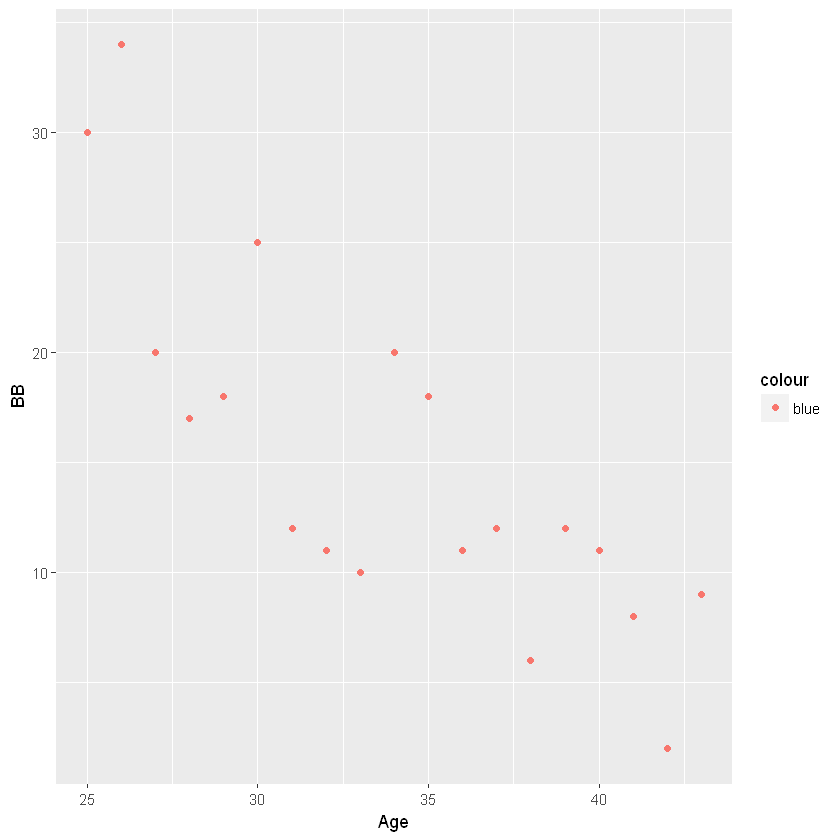

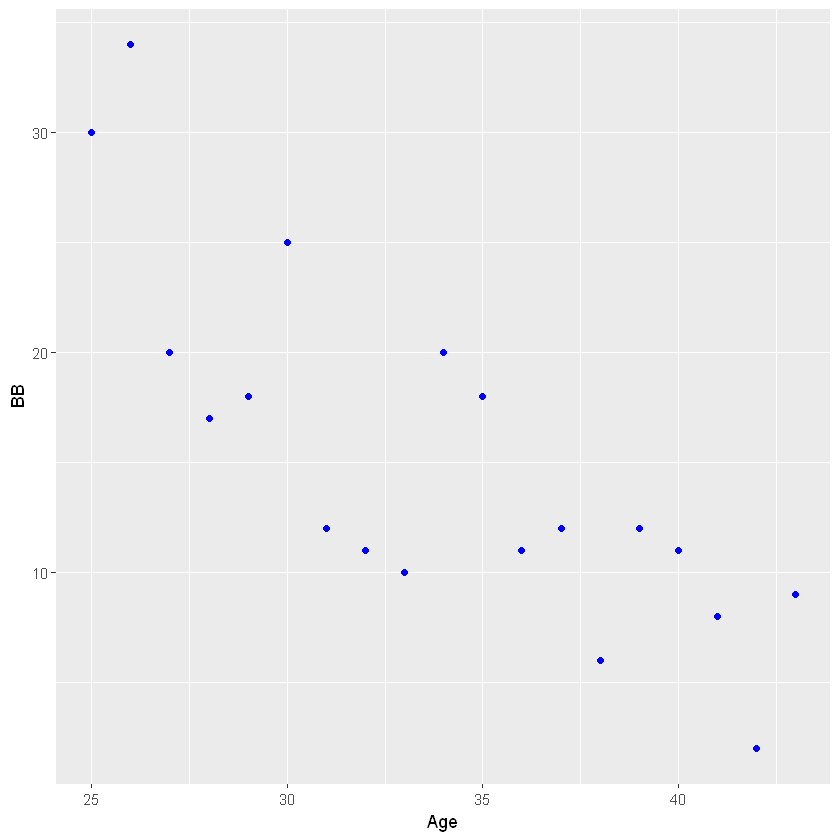

In [8]:
ggplot(from_csv, aes(Age, BB, colour = "blue")) + 
  geom_point()

ggplot(from_csv, aes(Age, BB)) + 
  geom_point(colour = "blue")

Nun haben wir unsere Grafik. Anhand dieser erkläre ich nun weitere Befehle / Grafiken. 

Die Grafik zeigt uns nun die Werte "Age" und "BB". Es ist jedoch nicht bekannt, ob es einen Zusammenhang zwischen den Daten gibt. Deshalb erfolgt nun eine sogenannte Regressions-Linie. 


**Verbesserungsvorschlag NG**
In den ersten drei sätzen kommt jedes mal das Wort nun vor,hört sich nichtt gaanz elegant an. evtl könnte ja einmal das rausgemacht werden

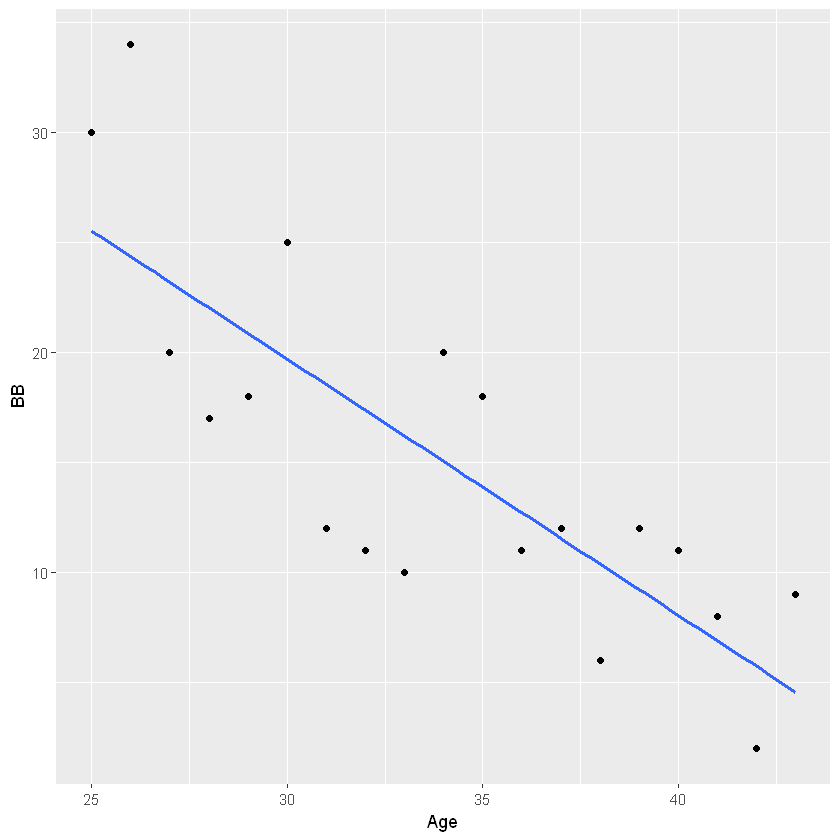

In [9]:
# Es wird ein Streudiagramm erstellt (vgl. oben) und dies wird der Hilfsvariable pplot zugewiesen, damit nicht ständig 
# der komplette neu Graf erzeugt werden muss
pplot <- ggplot(data=from_csv, aes(x=Age, y=BB)) + geom_point()
# geom_smooth (Glättung) wird hinzugefügt, mit "lm" wird die Regressionsvariable erzeugt, Intervall wird ausgeschlossen
pplot + geom_smooth(method = lm, se=F)

**Frage NG**

steht "se=f" für Interfall wird ausgeschlossen?

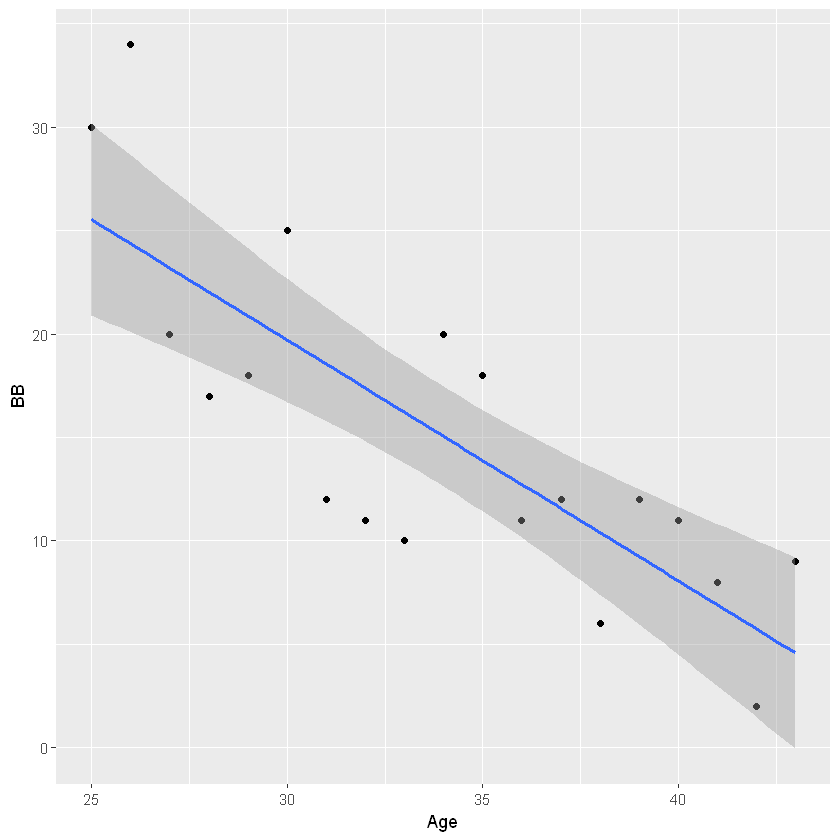

In [10]:
# gleich wie oben, jedoch hier ist das 95% - Standardintervall enthalten
pplot + 
  geom_smooth(method = lm)

Es ist sehr schnell zu erkenne, dass nur kleine änderungen im Code eine große Auswirkung auf die Grafik haben. 
Wie bereits oben zu sehen ist macht es einen Unterschied, ob das Intervall ausgeschlossen wir oder mit einbezogen. 

Aber nicht nur Regressionen sind in ggplot möglich, auch der Mittelwert und die Standardabweichung kann als Linie optisch dargestellt werden. 

Im anschließenden Code wird eine Mittelwertlinie und die Standardabweichung erzeugt. Die Linien werden hierfür Rot gefärbt. 
Andere Farben wie "blue", "green", "yellow" etc. sind natürlich auch möglich. 

**Verbesserungsvorschlag NG**

im Markdown: Änderung wird groß geschrieben 

Im Code unten: Bedeutung von $W.L., hat aufjedenfall was mit der Y-Achse zu tun das dort die sd und mean gezeichnet wird. bzw wieso steht im Code y= W.L. und in der Graphik bei y-Achse BB

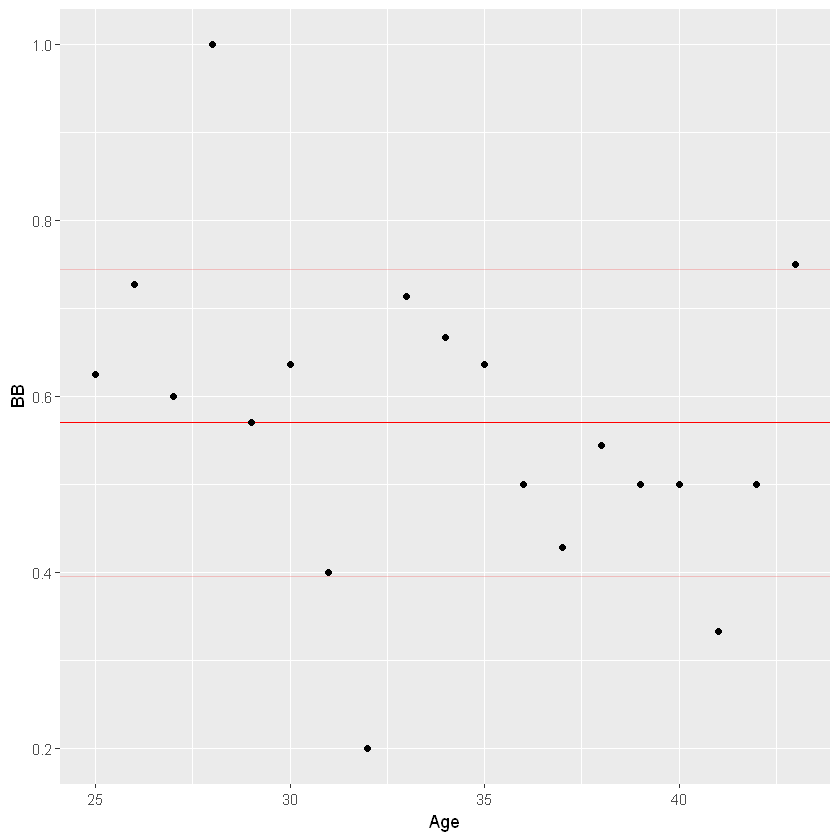

In [12]:
# geom_hline = die Linie 
# mean bedeutet der Mittelwert 
# sd die Standardabweichung 
ggplot(data=from_csv, aes(x=Age, y=BB)) + 
    geom_hline(yintercept=mean(from_csv$W.L.), color="red") +
    geom_hline(yintercept=mean(from_csv$W.L.) + sd(from_csv$W.L.), color="red", alpha=0.2) + 
    geom_hline(yintercept=mean(from_csv$W.L.) - sd(from_csv$W.L.), color="red", alpha=0.2) + 
    geom_point(data=from_csv, mapping=aes(x=Age, y=W.L.))

In ggplot2 lassen sich mehrere Grafiken zu einer zusammensetzen. Im folgenden Beispiel wird das obrige Streudiagramm und ein Boxplot miteinander kombiniert. 

Um Boxplots zu generieren benötgt man nur den Operator "+" und den Befehl *geom_boxplot()* 

Die Warnung kann ignoriert werden. 

### Boxplot (*geom_boxplot()*) 


Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

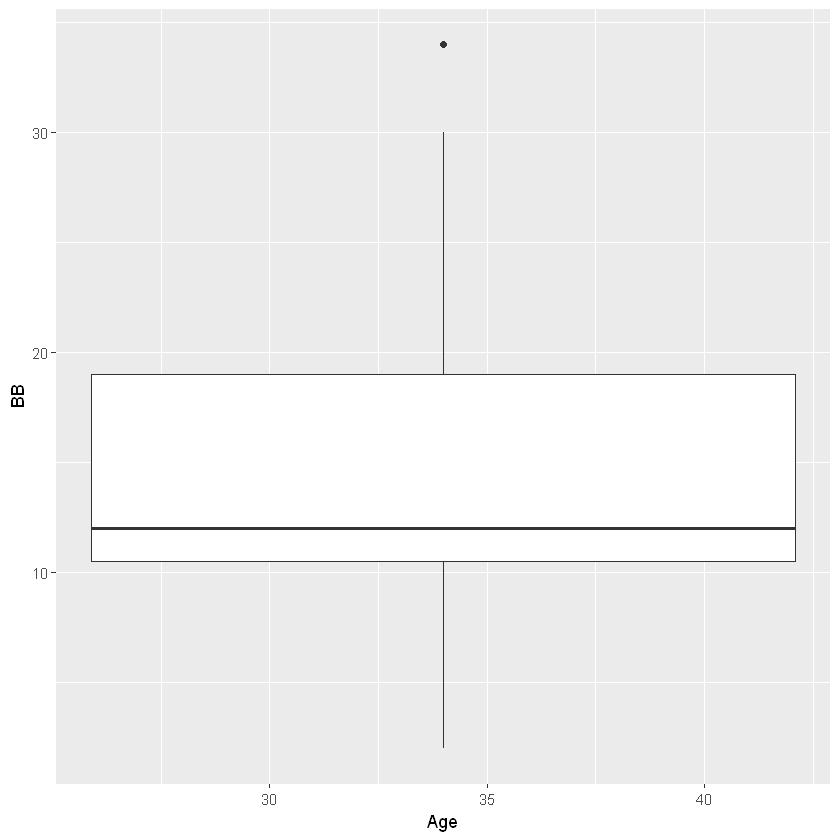

In [13]:
ggplot(data= from_csv, aes(x=Age, y=BB)) + geom_boxplot()
#geom_boxplot () erzeugt einen einfachen Boxplot

Warning message:
"Ignoring unknown aesthetics: Age"Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

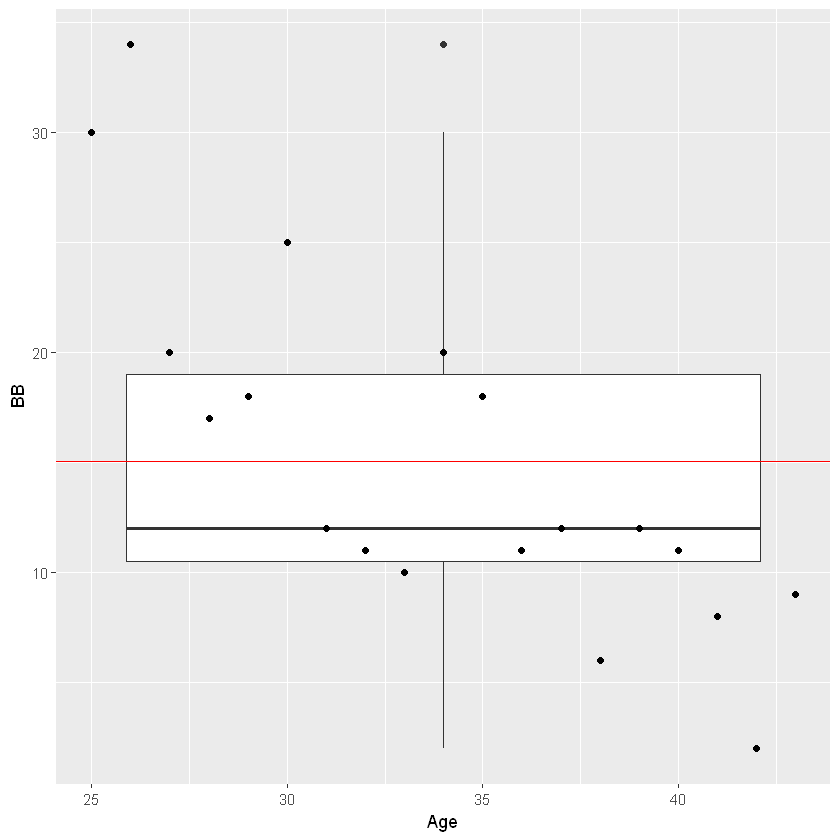

In [14]:

ggplot(data=from_csv, aes(x=Age, y=BB)) + 
    geom_boxplot(data=from_csv, mapping=aes(Age=W.L.)) + # boxplot benutzt die Daten aus "from_csv"
    geom_point() +  # Streudiagramm wird gezeichnet 
    geom_hline(yintercept=mean(from_csv$BB), color="red") # Mittelwert und Standardabweicung wird hinzugefügt

In [15]:
# Welche Argumente in einem Boxplot verwendet werden können 
args(geom_boxplot)

function (mapping = NULL, data = NULL, stat = "boxplot", position = "dodge", 
    ..., outlier.colour = NULL, outlier.color = NULL, outlier.fill = NULL, 
    outlier.shape = 19, outlier.size = 1.5, outlier.stroke = 0.5, 
    outlier.alpha = NULL, notch = FALSE, notchwidth = 0.5, varwidth = FALSE, 
    na.rm = FALSE, show.legend = NA, inherit.aes = TRUE) 
NULL

Mit Hilfe von ggplot2 und der Regression kann so schnell ein Zusammenhang zwischen den Daten festegestellt werden. Es können viele Grafiken erstellt werden, die den gleichen Datensatz enthalten aber andere Werte miteinander vergleicht. 

### Liniengrafiken  (*geom_line ()*)

Für den Liniengraf wird ein Dataframe mit zufälligen Zahlen erstellt, dieses Dataframe hat keinerlei Zusammenhang. Es dient nur zur Veranschaulichung des Grafens.

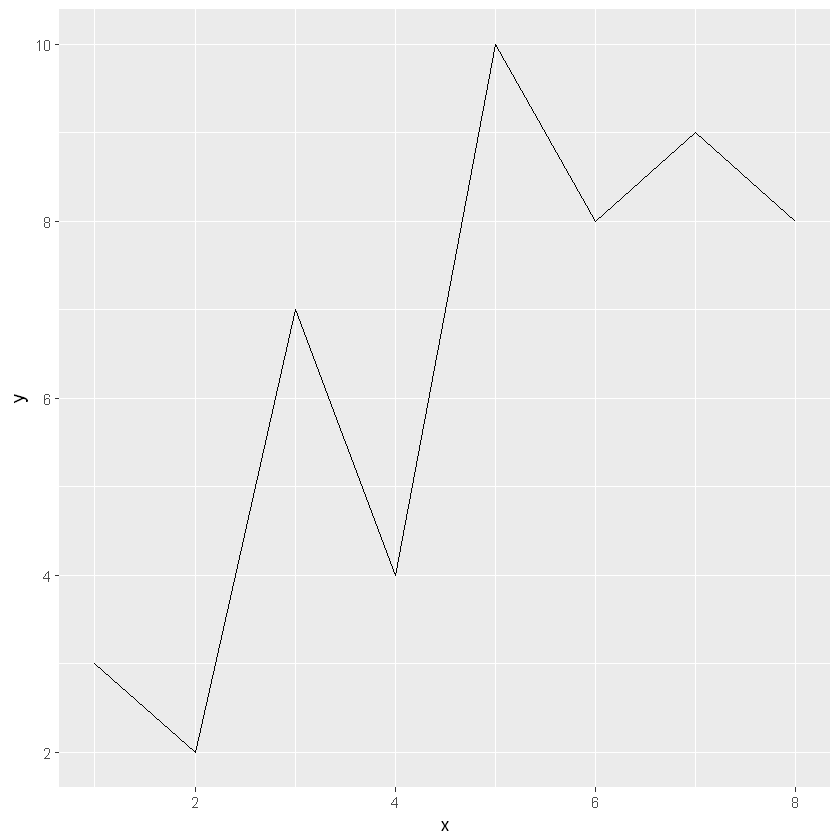

In [16]:
# mini dataframe
ddf <- data.frame(
    x = c( 1, 2, 3, 4, 5, 6, 7, 8),
    y = c( 3, 2, 7, 4, 10, 8, 9, 8),
    g = c(rep('m', 4), rep('w', 4))
    )

# Ein normaler ggplot mit Basis Informationen werden erstellt
pplot <- ggplot(data=ddf, aes(x=x, y=y))
# geom_line ( die Linien ) werden mit dem + Operator angehängt, Ergebnis -> Liniengrafik 
pplot + geom_line()

Es wird eine einfache Liniengrafik erzeugt, ohne Farben oder ähnliches. 

Manchmal soll in einer Auswertung gewisse Daten ausgeschlossen werden, dafür gibt es meist verschiedene Gründe. An dieser Stelle ist es bei einem Liniengrafen natürlich möglich. Mit Hilfe des "groub ="- Befehlt können Gruppen ausgeschlossen werden. 
Siehe Beispiel unten. 

**Verbesserungsvorschlag NG**

du hast sowohl im Text als auch im Kommentar grou**b**  geschrieben und im Code steht grou**p** 
und "groub ="-Befehl nicht Befehlt

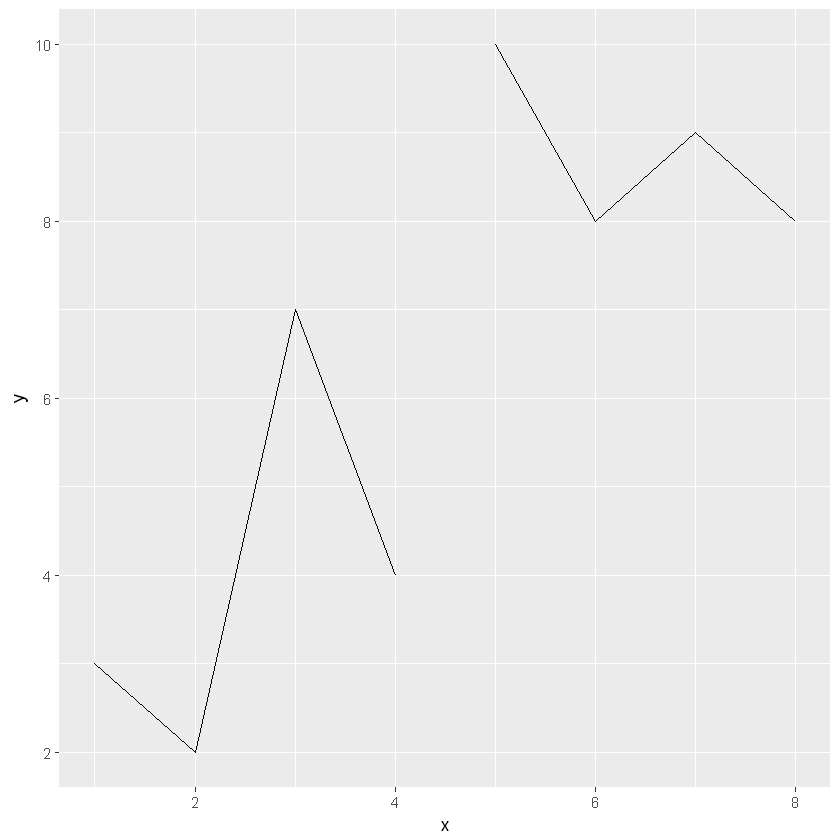

In [17]:
#Es wird eine Unterbrechung dargestellt mit dem "groub=" Befehl, die Variable g wird so ausgeschlossen

pplot <- ggplot(data=ddf, aes(x=x, y=y, group=g))
pplot + geom_line()



Dem Dataframe (ddf) werden mehrere neue Daten hinzugefügt um mehrere Linien zu erhalten, diese werden anschließend Farblich eingefärbt umd diese optisch zu Unterscheiden. 

**Veränderungsvorschlag NG**
Rechschreibfehler: ... diese werden anschließend **f**arblich eingefärbt um (ohne d) diese optisch zu **u**nterscheiden


Im code die Zeile:
g = c(rep('m', 4), rep('f', 4)) ist das wieder was mit group? weil ohne die Zeile geht die Grafik nicht

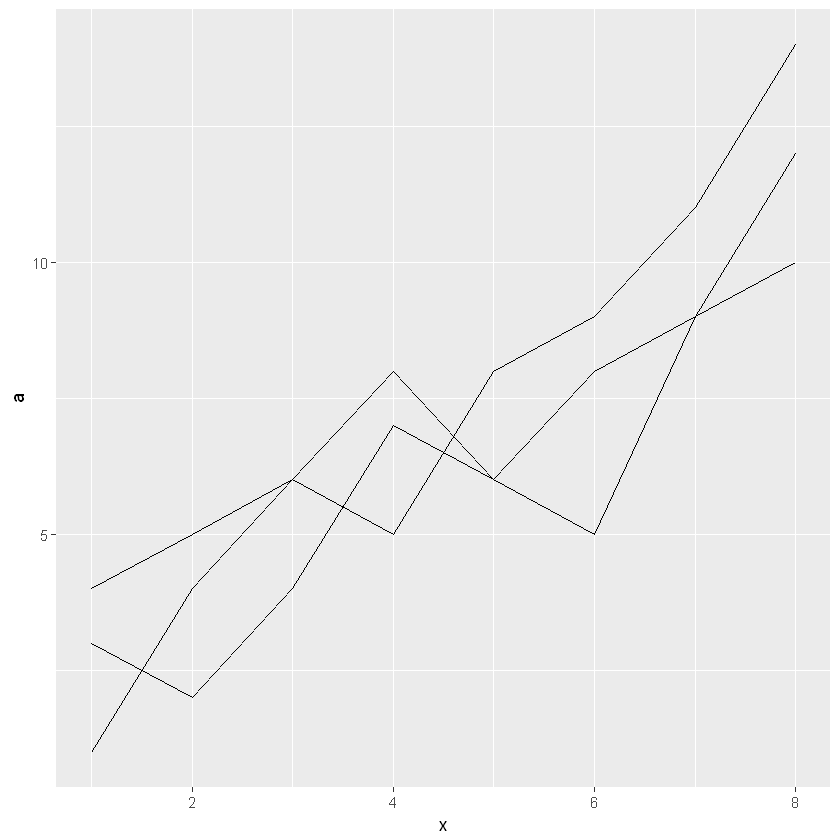

In [23]:
ddf <- data.frame(
    x  = c( 1, 2, 3, 4, 5, 6, 7, 8),
    a = c( 3, 2, 4, 7, 6, 8, 9, 10),
    b = c( 4, 5, 6, 5, 8, 9,11,14),
    c = c( 1, 4, 6, 8, 6, 5, 9, 12),
    g = c(rep('m', 4), rep('f', 4))
    )


pplot <- ggplot(data=ddf, aes(x=x))
# erzeuge 3 Linien
pplot + geom_line(aes(y=a)) + geom_line(aes(y=b)) + geom_line(aes(y=c))

**Verbesserungsvorschlag NG**

Frage: du hast oben colour geschrieben und hier jetzt color geht beides? ich würde es dann evtl einheitlich machen

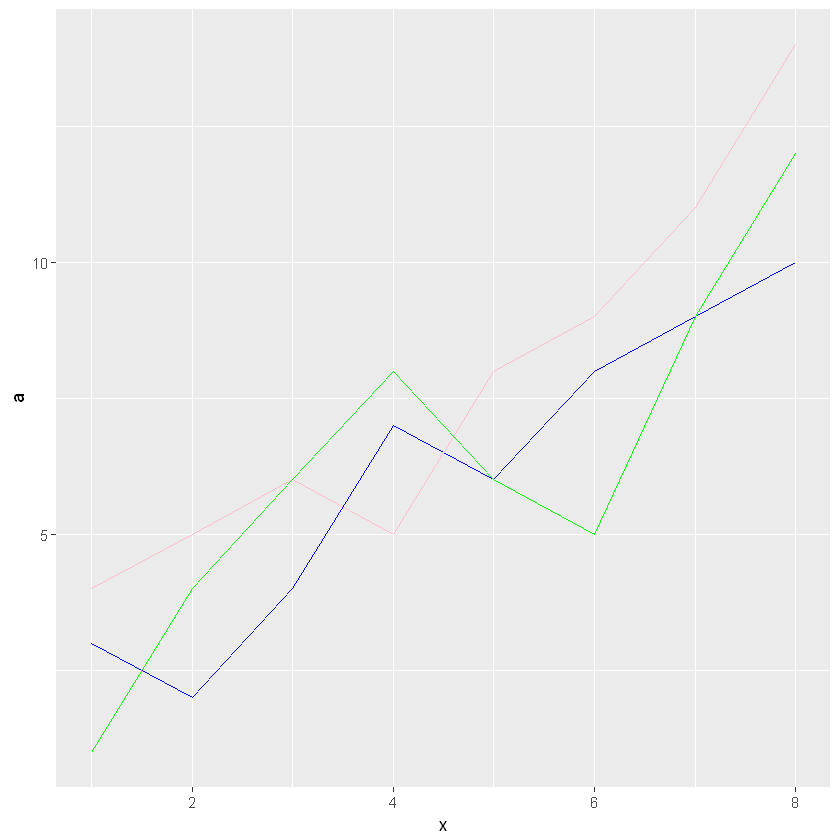

In [20]:
#Es ist nun sehr schwer zu erkennen, welche Linien welche Werte besitzen, desshalb werden die jeweiligen Linien eingefärbt.
# mit dem Zusatz color = "...".

pplot + geom_line(aes(y=a), color='blue') + geom_line(aes(y=b), color='pink') + geom_line(aes(y=c), color='green')



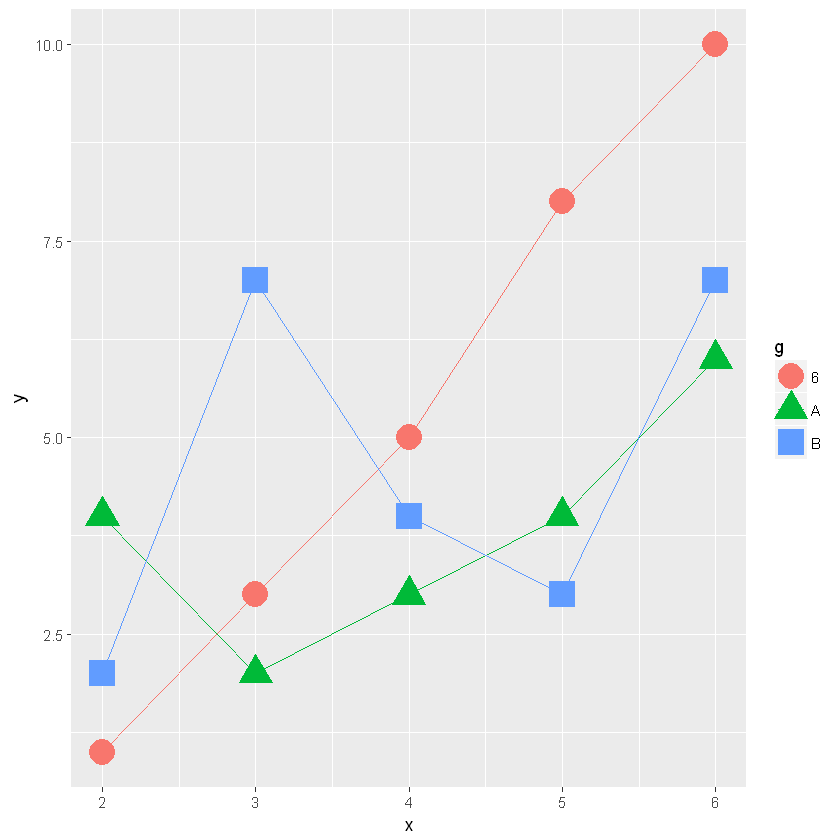

In [25]:
# Neuer Dataframe wieder mit willkürlichen Zahlen
nddf <- data.frame(
# Hier kann die Anzeige der Legende bestimmt werden, egal ob eine Zahl oder eine Beschreibung
    g  = factor(c( 'A', 'A','A','A','A', 'B','B','B','B','B',6, 6, 6, 6, 6)), # Hier kann die Anzeige der Legende bestimmt werden
    x  = rep(c(2, 3, 4, 5, 6), 3),
    #x  = c( 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6),
    y  = c( 4, 2, 3, 4, 6, 2, 7, 4, 3, 7, 1, 3, 5, 8, 10)
    )

# plot wird erzeugt
pplot <- ggplot(data=nddf, aes(x=x, y=y, group=g))

# Jede Linie erhält einen andere Frabe mit größern Punktenanzeigen
pplot + geom_line(aes(color=g)) + geom_point(aes(color=g, shape = g), size=7)

Wie zu sehen ist, kann man den Liniengrafiken mehrere Farben geben und auch die Punkte vergrößern, verkleinern. Selbst die Legende kann angepasst werden. Je nach Wunsch wird so der Graf Schritt für Schritt angepasst. 

Nun soll auf den ersten Blick erkannt werden, wie die Daten gestreut sind. Hierfür wird ein Liniendiagramm mit Streuinformationen erstellt. Dies darf bei einer statistischen Auswertung nicht fehlen. Denn die Streuung kann wichtige Informationen enthalten. 

#### Liniendiagramm mit Streuuungsinformationen

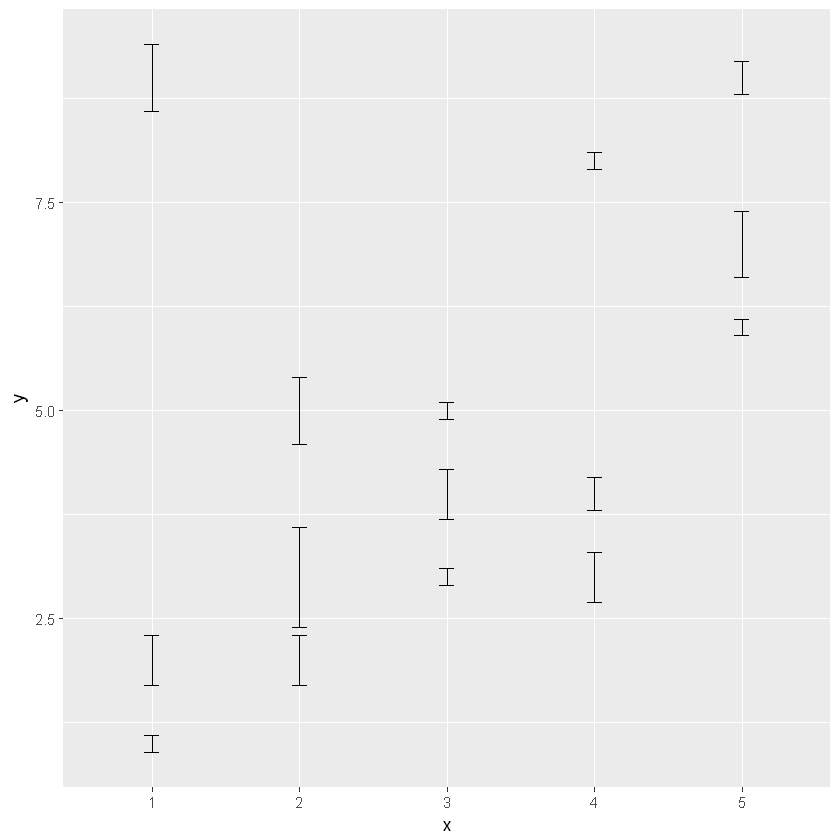

In [26]:
ddf <- data.frame(
    g  = factor(c( 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3)),
    x  = factor(rep(c(1, 2, 3, 4, 5), 3)),
    y  =        c( 9, 2, 3, 4, 6, 2, 5, 4, 3, 7, 1, 3, 5, 8, 9),
    se =        c(.4,.3,.1,.2,.1,.3,.4,.3,.3,.4,.1,.6,.1,.1,.2) #Dies ist der Abstand, der gezeigt werden soll 
    )

# Basic Plot wird erzeugt 
pplot <- ggplot(data=ddf, aes(x=x, y=y))

# geom_errorbar () zeigt die Fehlerbalken auf einer eigenen Ebene an 
# das y wird + se gerechnet, an der stelle des y wird ein Balken gezeichnet und an der Stelle (y+se) erneut ein Balken 
# An der Different des y und y+se wird dann die Linie gezeichnet 
pplot + geom_errorbar(aes(ymax = y + se, ymin=y - se), width=0.1)

### Balkendiagramm (*geom_bar ()*) 

Bei der statistischen Datenauswertung ist es oft sinnvoll Häufigkeiten oder Mittelwerte von Variablen in Form von Balkendiagrammen darzustellen. So lassen sich sehr einfach Vergleiche visualisieren. 

Das Balkendiagramm wird mit dem + Operator an den ggplot gehängt und somit generiert.
In dem Beispiel wird nun die Häufigkeit von Schüler in Abhängikeit zu dem Fach Mathe in Balken dargestellt. 

Zunächst wird dies mit einem ggplot() gemacht aber auch ein *qplot()* kann hierfür angewendet werden. Der dazugehörige Code steht unter dem ggplot generierten Balkendiagramm. 

Der Datensatz ist, wie bereits oben erwähnt, willkührlich zusammen gestellt. 

Name,Musik,Englisch,Sport,Chemie,Deutsch,Geschichte,Mathe,Biologie,Physik,Erdkunde,Kunst
Max Mustermann,2,4,1,2,3,3,1,2,1,2,3
Alfred Norm,1,3,2,4,5,6,2,3,5,2,1
Gorgina Hansemann,3,2,3,2,1,2,2,1,3,3,2
Lisa Jodel,4,1,6,4,2,2,3,1,4,5,6
Franz Herrmann,2,3,4,5,1,2,3,5,4,6,2
Timo Kanne,5,4,2,6,1,2,3,5,2,2,6


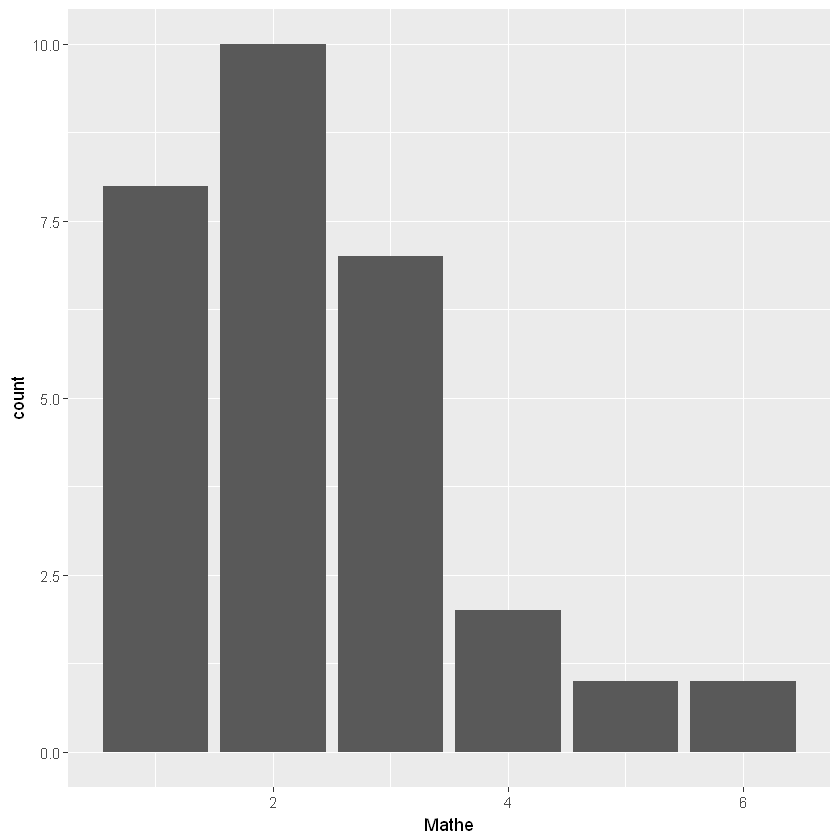

In [27]:
#Einlesen des Datensatzes
note <- read.csv('data/Note_Klasse_4b.csv', stringsAsFactors = FALSE, sep=';')
# Zeige mir die ersten 5 Zeilen des Datensatzes an
head(note)

ggplot(note, aes(Mathe)) + 
  geom_bar() # geom_bar () ist der Befehl für einen Balkendiagramm

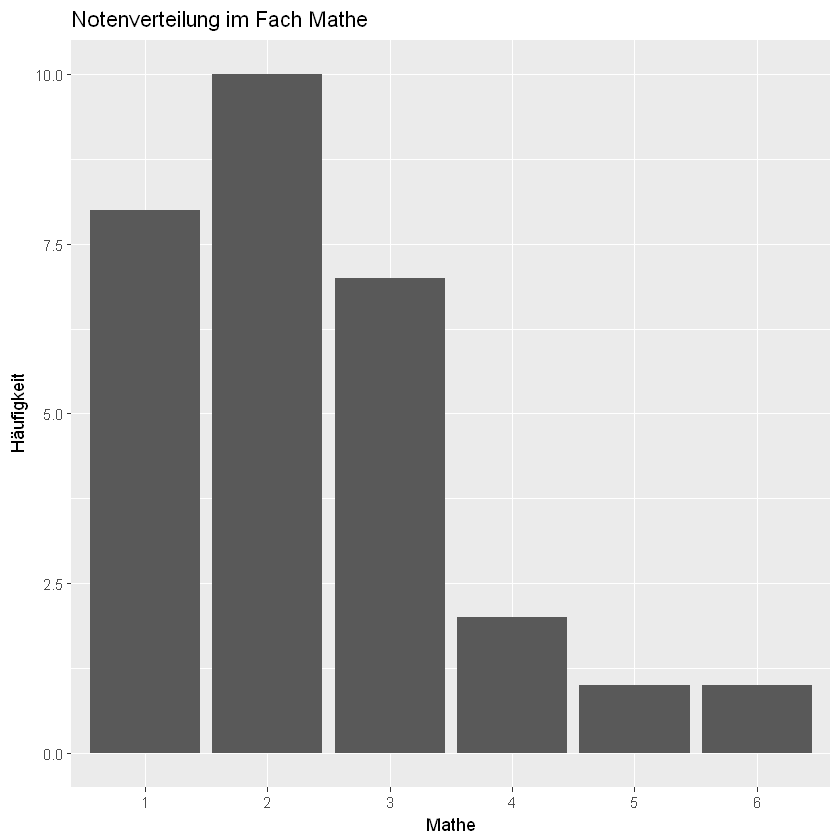

In [28]:
# Gleiches Balkendiagramm wie mit einem ggplot() nur hier wurden noch zusätzliche "Labels" erstellt

qplot(x = factor(note[, 8]), data = note, xlab = "Mathe", ylab = "Häufigkeit", 
    main = "Notenverteilung im Fach Mathe")

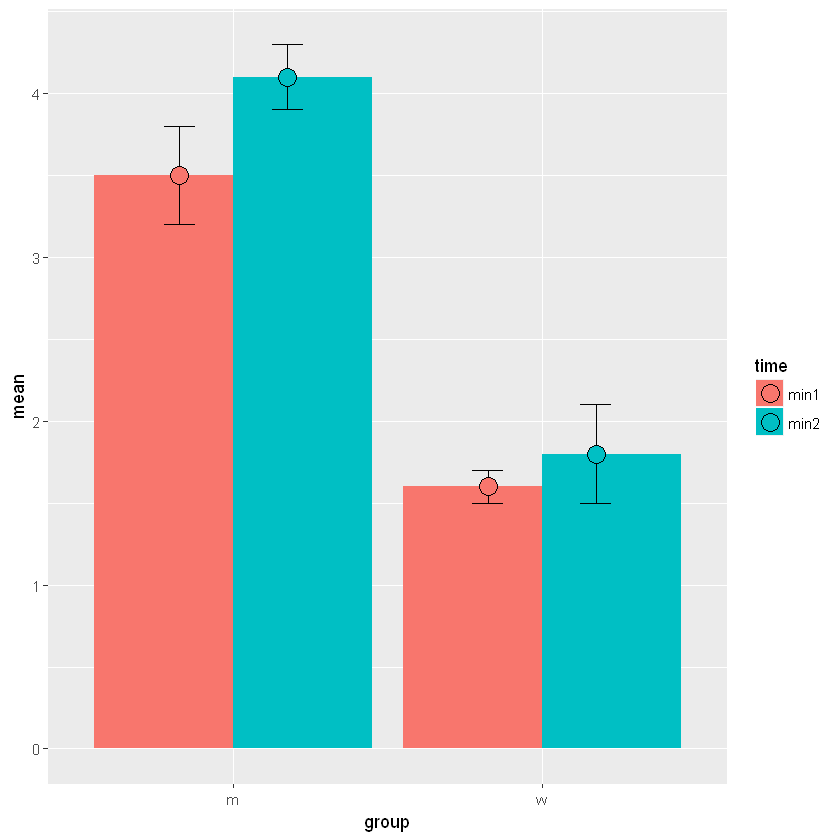

In [29]:
# mini dataframe
ddf <- data.frame(
    time  = c("min1", "min2", "min1", "min2"), # Die Zeitabschnitte, unterteilt in Minute 1 (min1) & Minute 2 (min2)
    group = c("w", "w", "m", "m"), # Die Gruppen stehen für m = männlich und w= weiblich
    mean  = c(1.6, 1.8, 3.5, 4.1), # Der Durchschnitt der Min1 und Min 2 von den Gruppen
    se    = c(0.1, 0.3, 0.3, 0.2)  # Der Se steht für Standardfehler
    )


# Erzeugt einen normalen Plot mit den Daten von oben
pplot <- ggplot(ddf, x=group, y=mean, aes(group, mean, fill = time))

# Balkendiagramm wird erzeugt
# geom_errorbar -> zeigt die Fehlerbalken auf einer eigenen Ebene an, in diesem Fall die Kreise mit den Wiskern 
# position_dodge () -> ausweichen, damit die Balken nebeneinander sind
# shape () gibt die Breite an und size () die Größe

pplot +
  geom_bar(stat="identity", position=position_dodge()) +
  geom_errorbar(aes(ymax = mean + se, ymin= mean - se), position = position_dodge(width=0.7), width=0.2) +
  geom_point(stat="identity", shape=21, size=5, position=position_dodge(width=0.7))

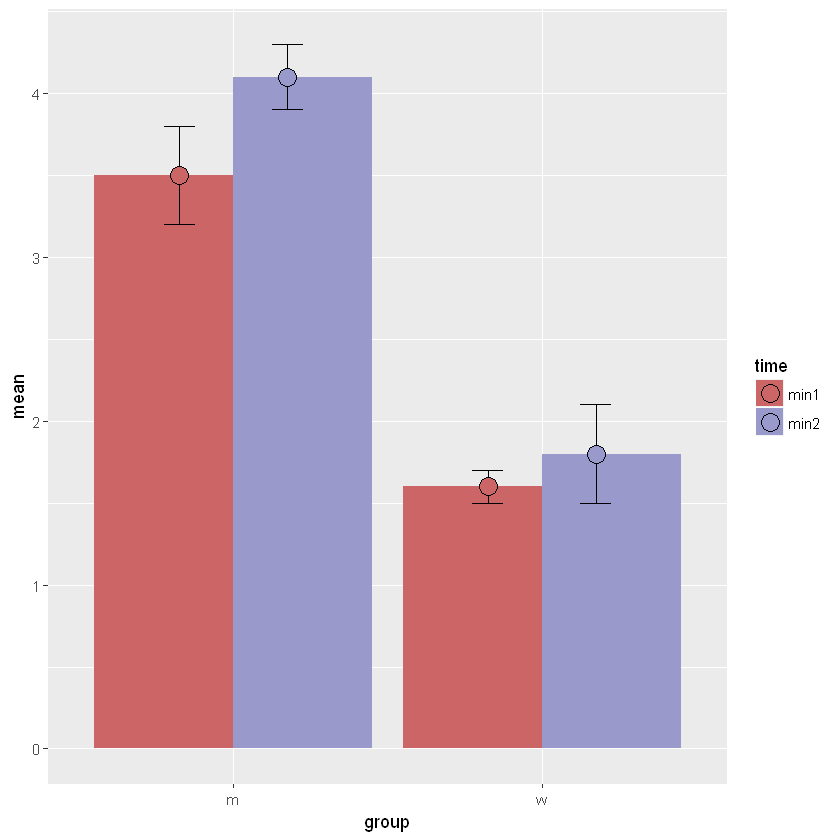

In [30]:
# genau das gleiche Diagramm nur dieses mal mit Hexadezialzahlen 
# geom_errorbar -> zeigt die Fehlerbalken auf einer eigenen Ebene an, in diesem Fall die Kreise mit den Wiskern 
pplot +
  geom_bar(stat="identity", position=position_dodge()) +
  geom_errorbar(aes(ymax = mean + se, ymin= mean - se), position = position_dodge(width=0.7), width=0.2) +
  geom_point(stat="identity", shape=21, size=5, position=position_dodge(width=0.7)) +
      scale_fill_manual(values=c("#CC6666", "#9999CC", "#66CC99"))
# scale_fill_manual () -> die Balken werden Manuell gefüllt mit Hexadezimalzahlen, davor muss jedoch ein # stehen. 
# Online gibt es die Farbpalette für die Hexadezimalzahlen, somit kann jede erdenkliche Farbe ausgewählt werden

### Density Plots (geom_density ())


Ein Density Plot visualisiert die Verteilung von Daten über ein kontinuierliches Intervall oder einen Zeitraum. Dieses Diagramm ist eine Variation eines Histogramms, das die Kernel-Glättung zum Plotten von Werten verwendet, wodurch glattere Verteilungen ermöglicht werden.

Ein Vorteil vom Density Plot gegenüber des Histogrammen besteht darin, dass sie die Verteilungsform besser bestimmen können, da sie nicht von der Anzahl der verwendeten Bins beeinflusst werden (jeder Balken wird in einem typischen Histogramm verwendet). Ein Histogramm, das nur aus 4 Behältern besteht, würde keine unterscheidbare Verteilungsform erzeugen, wie dies bei einem Histogramm mit 20 Behältern der Fall wäre. Bei Density Plots ist dies jedoch kein Problem.

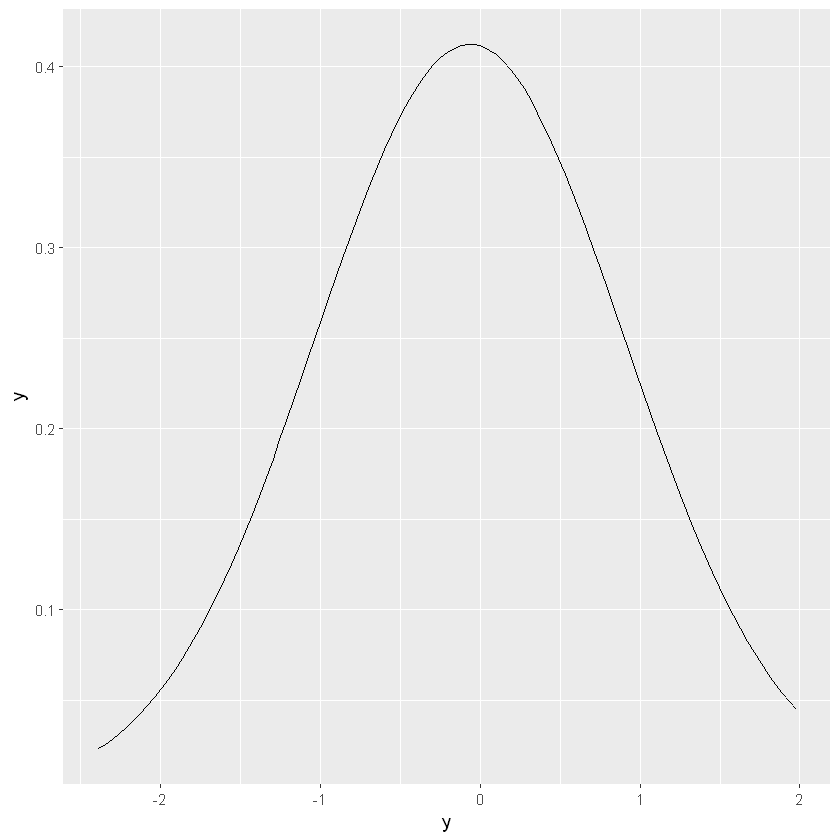

In [31]:
# rnorm -> Normalverteilung 
df <- data.frame(x=1:100, y=rnorm(100,0,1))
ggplot(df, aes(y)) + stat_function(fun=dnorm, args=list(mean=mean(df$y), sd=sd(df$y)))

**Verbesserungsvorschlag NG**
zur Grafik darüber: Ich glaub du hast die Achsen ausversehen beide y genannt

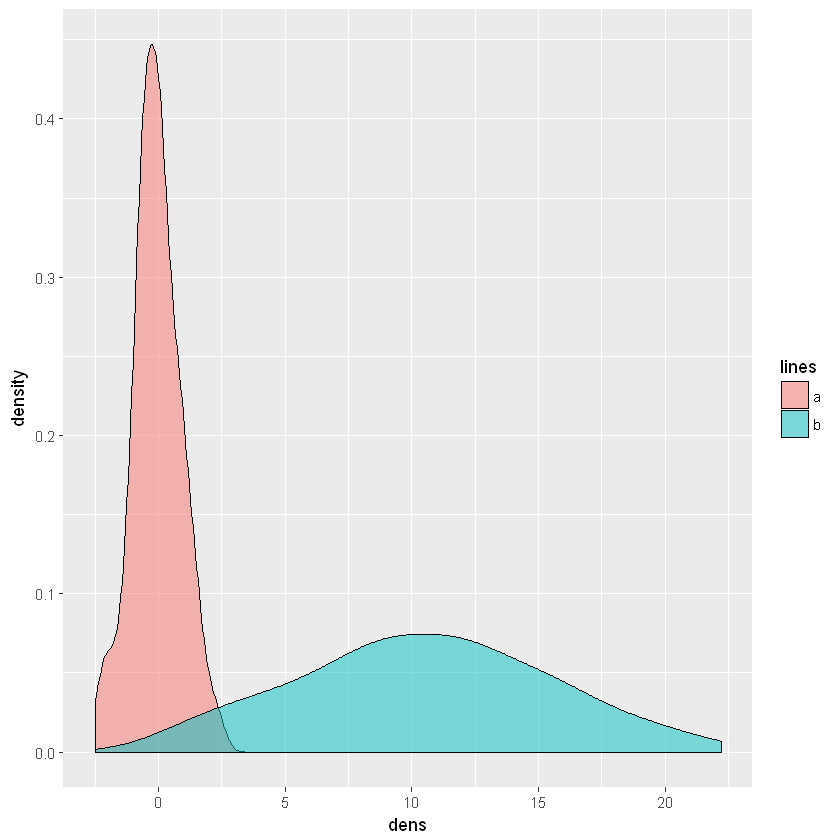

In [32]:
#Einfacher Datensatz mit leicht normalverteilt 
dat <- data.frame(dens = c(rnorm(100), rnorm(100, 10, 5))
                   , lines = rep(c("a", "b"), each = 100))
#Plot wird erzeugt mit der Alpha Dichte von 0.5
ggplot(dat, aes(x = dens, fill = lines)) + geom_density(alpha = 0.5)

### Heatmap (*heatmap()* / *geom_tile()*)

Um eine Heatmap zu generien, wird der Datensatz (diamonds) verwendet, dieser befindet sich auf GitHub. Die Daten stellte Hassan Kibirige (has2k1) zur Verfügung und wurden von Herrn Hadley Wickham (hadley) kommentiert bzw. bearbeitet. Die Daten sind für alle öffentlich zugänglich. Ebenso befindet sich der Datensatz in dem Ordner "data". 



In [33]:
#Einlesen des Datensatzes und Anzeigen der ersten Zeilen
diamonds <- read.csv('data/diamonds.csv', stringsAsFactors = FALSE)
head(diamonds) 


carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [34]:
colnames(diamonds) # Zeigt die Spaltennamen an 

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

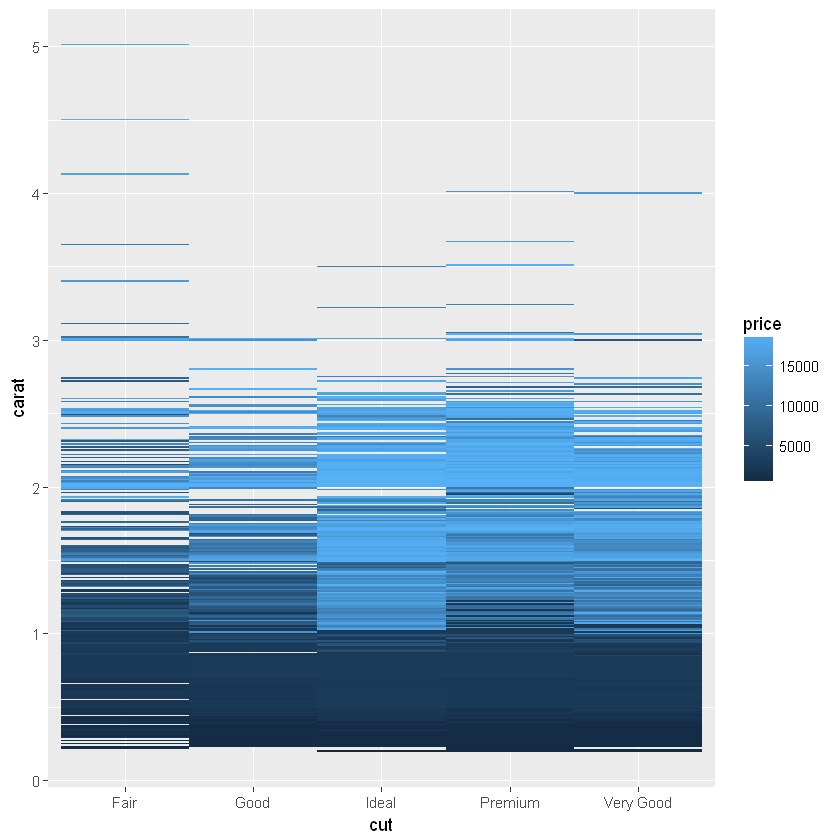

In [35]:
#Hier wird geom_tile() angewendet, erzeugt Kacheln
ggplot(data = diamonds, aes(x=cut, y=carat, fill=price)) + 
  geom_tile()

Das Ergebniss kann nicht direkt als eine Heatmap gesehen werden, da nur 3 verschiedene Variablen / Werte verwendet wurden. Das Prinzip einer Heatmap ist es, aus einem großen Datensatz schnell einen Überblick zu erhalten und welche Werte besonders herrausstechen. Dabei soll der Farbunterschied eine Hilfe sein. 

In dem Beispiel oben (mit den Diamanten) wird der Schnitt und der Carat Wert gegenüber gestellt und zugeleich der Preis zugewiesen. Das Ergebnis ist logisch, da ein Diamant mit einem hohen Carat Wert und gutem Schnitt teurer ist. 

Um das Prinzip einer Heatmap zu verdeutlichen wurde ein fiktiver Datensatz erstellt. Bereits bei den Balkendiagrammen wurde dieser Datensatz verwendet. 

An dieser Stelle wird die Grafik mit dem **heatmap ()** - Befehl generiert. 

Name,Musik,Englisch,Sport,Chemie,Deutsch,Geschichte,Mathe,Biologie,Physik,Erdkunde,Kunst
Max Mustermann,2,4,1,2,3,3,1,2,1,2,3
Alfred Norm,1,3,2,4,5,6,2,3,5,2,1
Gorgina Hansemann,3,2,3,2,1,2,2,1,3,3,2
Lisa Jodel,4,1,6,4,2,2,3,1,4,5,6
Franz Herrmann,2,3,4,5,1,2,3,5,4,6,2
Timo Kanne,5,4,2,6,1,2,3,5,2,2,6


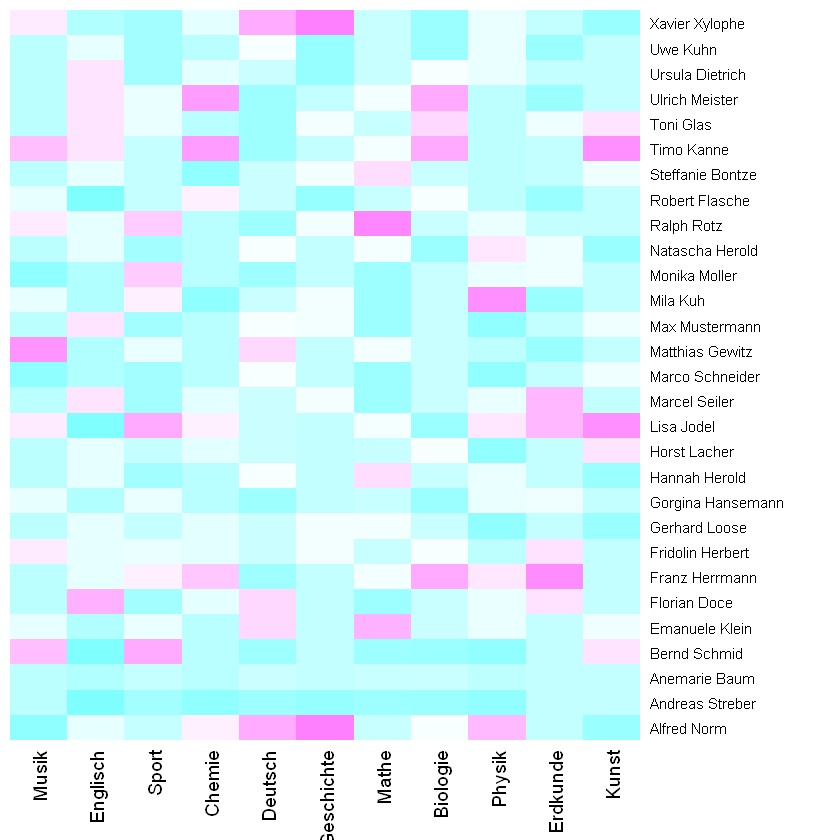

In [36]:
# Einlesen des Datensatzes und dieser wird der Hilfsvariable "hm" zugewiesen
hm <- read.csv('data/Note_Klasse_4b.csv', stringsAsFactors = FALSE, sep=';')
# Zeige mir die ersten 5 Zeilen des Datensatzes an
head(hm)

# der Datensatz wird nach Name sortiert
hm <- hm[order(hm$Name),]

#Den Roh-namen wird die Spalte Name zugewiesen
row.names(hm) <- hm$Name

# es sollen die Spalten 2 - 12 dargestellt werden, in diesem Fall die ganzen Fächer, die Spalte Name wird hier weg gelassen 
# Grund dafür ist, weil oben die Datei bereits nach Namen sortiert wurde
hm <- hm[,2:12]

# eine matrix wird erstellt, Grund dafür -> heatmap() benötigt eine Matrix
hm_matrix <- data.matrix(hm)

# Die heatmap wird erzeugt
# Die oben erstelle Matrix wird hierfür benötigt, sind keine Werte angegeben (NA) sollen diese ignoriert werden
# Es wird nach den Spalten skaliert 
# Die größe der "Kästchen" beträgt 5 auf 10 pixel
hm_heatmap <- heatmap(hm_matrix, Rowv=NA, Colv=NA, col = cm.colors(256), scale="column", margins=c(5,10))

Die Heatmap zeigt alle Schüler der Klasse 4b an und die jeweilige Notenverteilung. 
Ist die Farbe im Bereich von Hellblau / Türkis so besitzt der Schüler in diesem Fach eine 1, Weiß bedeuet das Mittelfeld -> Note 3 und Lila/ Pink bedeutet, dass der Schüler eine schlechte Note besitzt -> Note 5 und 6. 

Mit der Heatmap soll auf einen Blick visualisiert werden, welche Aussreißer vorhanden sind. Worrauf soll besonders geachtet werden? 
Anhand der verschiedener Farben ist dies sofort zu erkennen. 

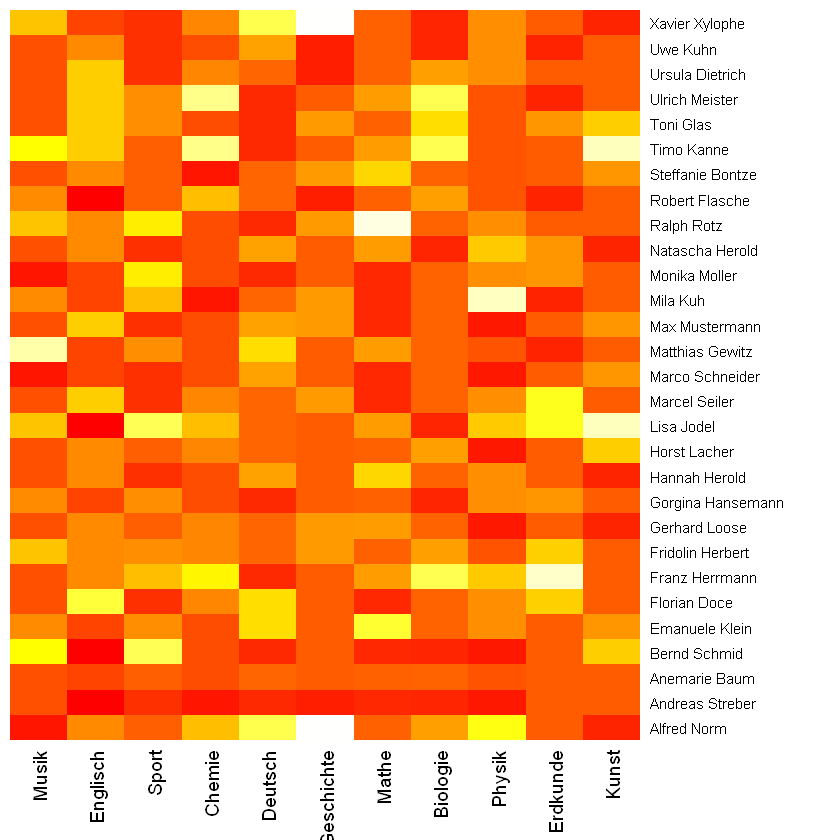

In [37]:
# genau die gleiche Heatmap wie oben, nur die Farben wurden geändert
hm_heatmap <- heatmap(hm_matrix, Rowv=NA, Colv=NA, col = heat.colors(256), scale="column", margins=c(5,10))

**Verbesserungsvorschlag NG**

Mur zum verständnis eine Frage: Bei der Ausgabne kommen die Hexadezimal zahlen von der Heatmap oben und was für einen Online Generator meinst du? bzw hast du eine passende Seite dafür.

In [38]:
# Hier wird die Farbpalette für den Wert 256 angezeigt. 
# Die Ausgabe gibt Hexadezimalwerte zurück, mit Hilfe eines Online-Generators können die Farben betrachtet werden. 
heat.colors(256)

[1] "#FF0000FF" "#FF0100FF" "#FF0300FF" "#FF0400FF" "#FF0500FF" "#FF0700FF"
  [7] "#FF0800FF" "#FF0900FF" "#FF0B00FF" "#FF0C00FF" "#FF0D00FF" "#FF0F00FF"
 [13] "#FF1000FF" "#FF1100FF" "#FF1300FF" "#FF1400FF" "#FF1500FF" "#FF1700FF"
 [19] "#FF1800FF" "#FF1900FF" "#FF1B00FF" "#FF1C00FF" "#FF1D00FF" "#FF1F00FF"
 [25] "#FF2000FF" "#FF2100FF" "#FF2300FF" "#FF2400FF" "#FF2500FF" "#FF2700FF"
 [31] "#FF2800FF" "#FF2900FF" "#FF2B00FF" "#FF2C00FF" "#FF2D00FF" "#FF2F00FF"
 [37] "#FF3000FF" "#FF3100FF" "#FF3300FF" "#FF3400FF" "#FF3500FF" "#FF3700FF"
 [43] "#FF3800FF" "#FF3900FF" "#FF3B00FF" "#FF3C00FF" "#FF3D00FF" "#FF3F00FF"
 [49] "#FF4000FF" "#FF4100FF" "#FF4300FF" "#FF4400FF" "#FF4500FF" "#FF4700FF"
 [55] "#FF4800FF" "#FF4900FF" "#FF4B00FF" "#FF4C00FF" "#FF4D00FF" "#FF4F00FF"
 [61] "#FF5000FF" "#FF5100FF" "#FF5300FF" "#FF5400FF" "#FF5500FF" "#FF5700FF"
 [67] "#FF5800FF" "#FF5900FF" "#FF5B00FF" "#FF5C00FF" "#FF5D00FF" "#FF5F00FF"
 [73] "#FF6000FF" "#FF6100FF" "#FF6300FF" "#FF6400FF" "#FF6500FF" "#FF6700FF"
 [79] "#FF6800FF" "#FF6900FF" "#FF6B00FF" "#FF6C00FF" "#FF6D00FF" "#FF6F00FF"
 [85] "#FF7000FF" "#FF7100FF" "#FF7300FF" "#FF7400FF" "#FF7500FF" "#FF7700FF"
 [91] "#FF7800FF" "#FF7900FF" "#FF7B00FF" "#FF7C00FF" "#FF7D00FF" "#FF7F00FF"
 [97] "#FF8000FF" "#FF8200FF" "#FF8300FF" "#FF8400FF" "#FF8600FF" "#FF8700FF"
[103] "#FF8800FF" "#FF8A00FF" "#FF8B00FF" "#FF8C00FF" "#FF8E00FF" "#FF8F00FF"
[109] "#FF9000FF" "#FF9200FF" "#FF9300FF" "#FF9400FF" "#FF9600FF" "#FF9700FF"
[115] "#FF9800FF" "#FF9A00FF" "#FF9B00FF" "#FF9C00FF" "#FF9E00FF" "#FF9F00FF"
[121] "#FFA000FF" "#FFA200FF" "#FFA300FF" "#FFA400FF" "#FFA600FF" "#FFA700FF"
[127] "#FFA800FF" "#FFAA00FF" "#FFAB00FF" "#FFAC00FF" "#FFAE00FF" "#FFAF00FF"
[133] "#FFB000FF" "#FFB200FF" "#FFB300FF" "#FFB400FF" "#FFB600FF" "#FFB700FF"
[139] "#FFB800FF" "#FFBA00FF" "#FFBB00FF" "#FFBC00FF" "#FFBE00FF" "#FFBF00FF"
[145] "#FFC000FF" "#FFC200FF" "#FFC300FF" "#FFC400FF" "#FFC600FF" "#FFC700FF"
[151] "#FFC800FF" "#FFCA00FF" "#FFCB00FF" "#FFCC00FF" "#FFCE00FF" "#FFCF00FF"
[157] "#FFD000FF" "#FFD200FF" "#FFD300FF" "#FFD400FF" "#FFD600FF" "#FFD700FF"
[163] "#FFD800FF" "#FFDA00FF" "#FFDB00FF" "#FFDC00FF" "#FFDE00FF" "#FFDF00FF"
[169] "#FFE000FF" "#FFE200FF" "#FFE300FF" "#FFE400FF" "#FFE600FF" "#FFE700FF"
[175] "#FFE800FF" "#FFEA00FF" "#FFEB00FF" "#FFEC00FF" "#FFEE00FF" "#FFEF00FF"
[181] "#FFF000FF" "#FFF200FF" "#FFF300FF" "#FFF400FF" "#FFF600FF" "#FFF700FF"
[187] "#FFF800FF" "#FFFA00FF" "#FFFB00FF" "#FFFC00FF" "#FFFE00FF" "#FFFF00FF"
[193] "#FFFF02FF" "#FFFF06FF" "#FFFF0AFF" "#FFFF0EFF" "#FFFF12FF" "#FFFF16FF"
[199] "#FFFF1AFF" "#FFFF1EFF" "#FFFF22FF" "#FFFF26FF" "#FFFF2AFF" "#FFFF2EFF"
[205] "#FFFF32FF" "#FFFF36FF" "#FFFF3AFF" "#FFFF3EFF" "#FFFF42FF" "#FFFF46FF"
[211] "#FFFF4AFF" "#FFFF4EFF" "#FFFF52FF" "#FFFF56FF" "#FFFF5AFF" "#FFFF5EFF"
[217] "#FFFF62FF" "#FFFF66FF" "#FFFF6AFF" "#FFFF6EFF" "#FFFF72FF" "#FFFF76FF"
[223] "#FFFF7AFF" "#FFFF7EFF" "#FFFF81FF" "#FFFF85FF" "#FFFF89FF" "#FFFF8DFF"
[229] "#FFFF91FF" "#FFFF95FF" "#FFFF99FF" "#FFFF9DFF" "#FFFFA1FF" "#FFFFA5FF"
[235] "#FFFFA9FF" "#FFFFADFF" "#FFFFB1FF" "#FFFFB5FF" "#FFFFB9FF" "#FFFFBDFF"
[241] "#FFFFC1FF" "#FFFFC5FF" "#FFFFC9FF" "#FFFFCDFF" "#FFFFD1FF" "#FFFFD5FF"
[247] "#FFFFD9FF" "#FFFFDDFF" "#FFFFE1FF" "#FFFFE5FF" "#FFFFE9FF" "#FFFFEDFF"
[253] "#FFFFF1FF" "#FFFFF5FF" "#FFFFF9FF" "#FFFFFDFF"

In [39]:
# Welche Argumente es für die Heatmap gibt.
args(heatmap)

function (x, Rowv = NULL, Colv = if (symm) "Rowv" else NULL, 
    distfun = dist, hclustfun = hclust, reorderfun = function(d, 
        w) reorder(d, w), add.expr, symm = FALSE, revC = identical(Colv, 
        "Rowv"), scale = c("row", "column", "none"), na.rm = TRUE, 
    margins = c(5, 5), ColSideColors, RowSideColors, cexRow = 0.2 + 
        1/log10(nr), cexCol = 0.2 + 1/log10(nc), labRow = NULL, 
    labCol = NULL, main = NULL, xlab = NULL, ylab = NULL, keep.dendro = FALSE, 
    verbose = getOption("verbose"), ...) 
NULL

#### Weiteres Beispiel für eine Heatmap 

Mit dem Datensatz "flights" - Quelle: GitHub von Hassan Kibirige zur Verfügung gestellt, wird eine weitere Heatmap erzeugt. 
Jedoch nur mit dem Befehl *geom_tile()* (dem Kachel Prinzip) 

Diese Art von Heatmap zeigt die Anzahl der Passagiere in den jeweiligen Monaten zu den Jahren an. 

In [40]:
#Einlesen der Daten und anzeigen der Ersten 5 Zeilen
flight = read.csv('data/flights.csv')
head(flight)


year,month,passengers
1949,January,112
1949,February,118
1949,March,132
1949,April,129
1949,May,121
1949,June,135


Warning message:
"Ignoring unknown aesthetics: width, height"

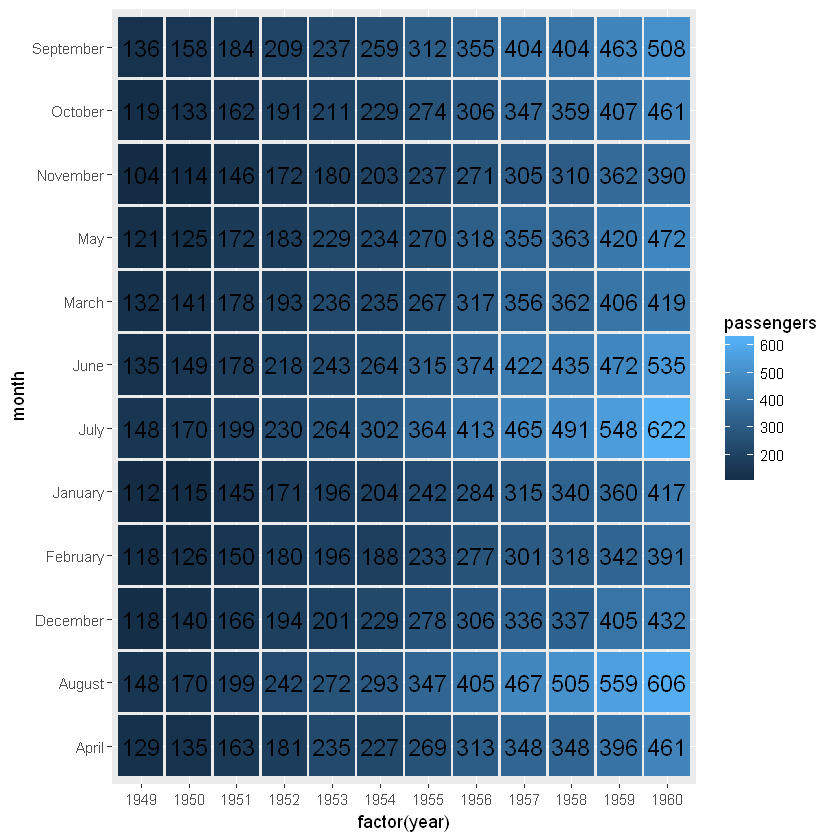

In [41]:
# Es werden die Jahre und die Monate miteinander verglichen im Bezug auf die Passagiereanzahl
# Die "width" und "height" bestimmen die Abstände zwischen den Kacheln
# Das "label" schreibt die Anzahl der Passagiere in die Kacheln in einer Größe von 5
# factor() zeigt alle Werte an, in diesem Fall werden alle Jahreszahlen auf der X-Achse angezeigt 
# wäre das facotr() weg, würden nur 3 Jahreszahlen dran stehen, mit einem Abstand (bsp: 1949 , 1954, 1960)

(ggplot(flight, aes(x=factor(year), y=month, fill=passengers))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label=passengers), size=5)
)

Warning message:
"Ignoring unknown aesthetics: width, height"

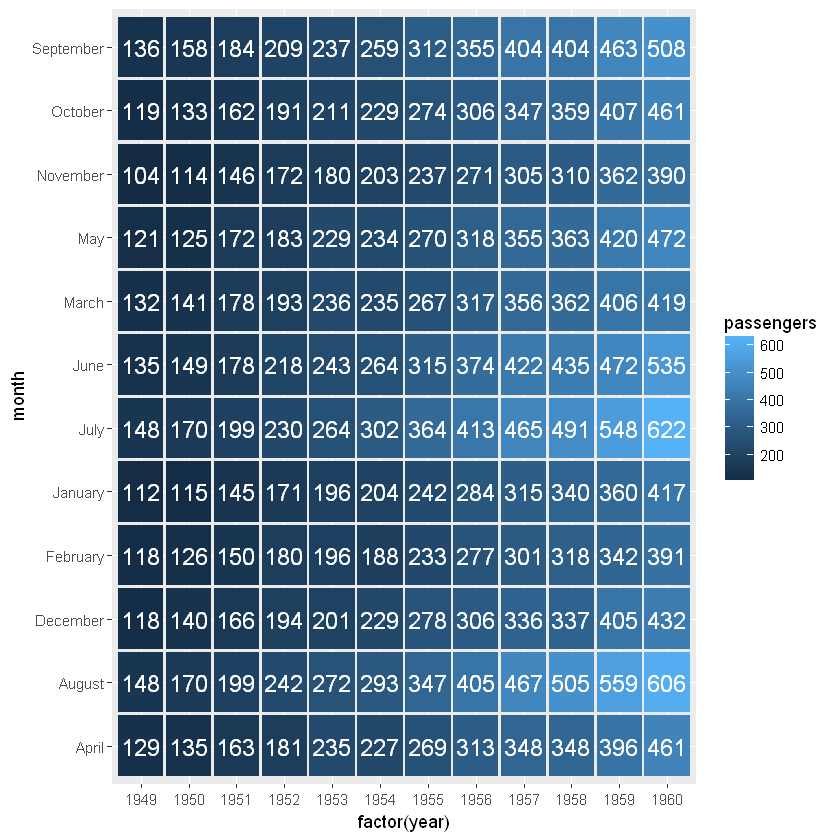

In [42]:
# Es wird die gleiche Heatmap wie oben gezeichnet 
# Unterschied: Die Farbe der Zahlenanzeige wird auf Weiß gestellt -> Nun deutlicher sichtbar
(ggplot(flight, aes(x=factor(year), y=month, fill=passengers))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label=passengers), size=5, color="white")  # modified
)

Mit dem Packet ggplot2 kann in R verschiedene Grafiken erstellt werden. Dabei ist besonders darauf zu Achten, dass die Syntax eingehalten wird und die Daten vollständig bzw. korrekt sind.  

Sofern Sie komplexere Grafiken erstellen wollen finden Sie zahlreiche Informationen in GitHub. Der dazugehörige Link ist oben zu finden. 

Um dieses Notebook zu erstellen wurden folgende Quellen verwendet: 

1. Buch: "Data Visualisation with R", Autor: Thomas Rahlf, Verlag: Springer
2. Buch: "ggplot2" Autor: Hadley Wickham, Verlag: Springer
3. GitHub: https://github.com/tidyverse/ggplot2
4. https://rstudio-pubs-static.s3.amazonaws.com/85339_4c86e2080b7642b19e5eaf5b0a7f34f2.html#mpg
5. http://flowingdata.com/2010/01/21/how-to-make-a-heatmap-a-quick-and-easy-solution/
